In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from models.tinyvit import TinyViT
from utils.tinyvit_utils import transform_test

In [7]:
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform_test)
class_names = test_dataset.classes
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TinyViT().to(device)
model.load_state_dict(torch.load("best_tinyvit_cifar10.pth", map_location=device))
model.eval()

TinyViT(
  (patch_embed): PatchEmbedding(
    (patches_embedding): Conv2d(3, 64, kernel_size=(4, 4), stride=(4, 4))
  )
  (vit_embed): ViTEmbedding()
  (transformers): Sequential(
    (0): TransformerEncoderBlock(
      (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
      )
      (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=64, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
    )
    (1): TransformerEncoderBlock(
      (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
      )
      (norm2): LayerNo

In [8]:
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

images = images.cpu()
preds = preds.cpu()
labels = labels.cpu()

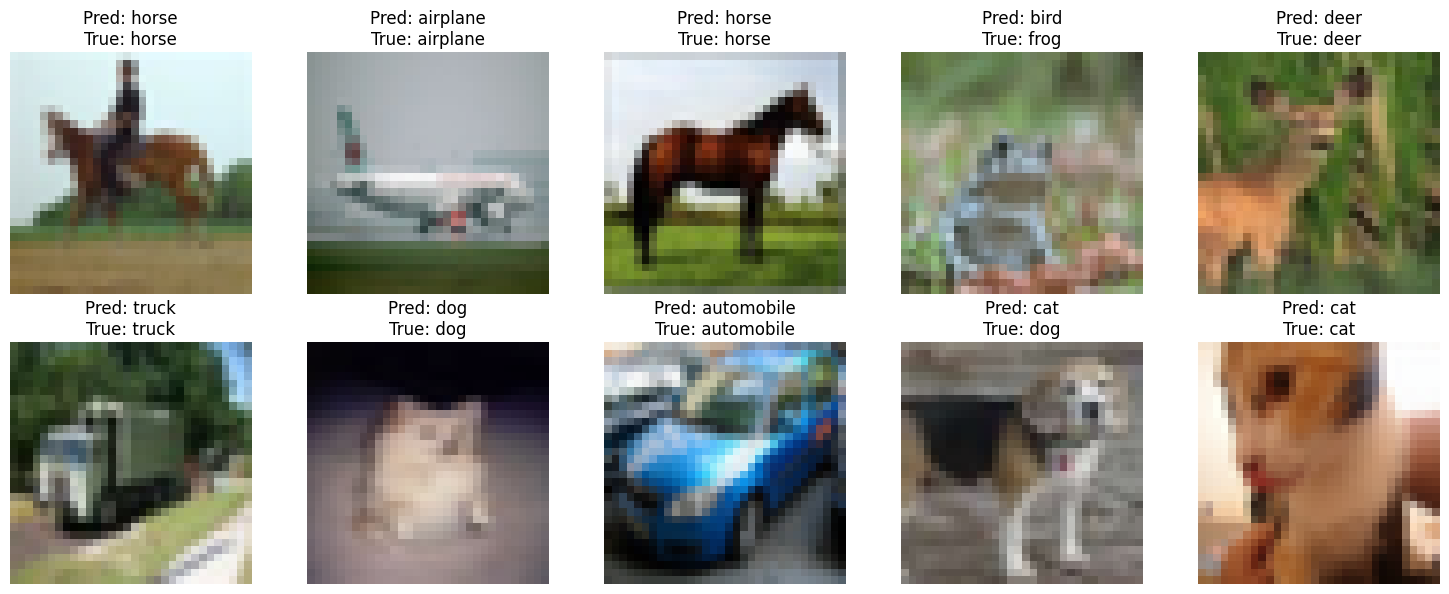

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i in range(10):
    img = images[i].permute(1, 2, 0).numpy()
    img = img * np.array([0.2467, 0.2429, 0.2616]) + np.array([0.4942, 0.4851, 0.4504])  # Unnormalize
    img = np.clip(img, 0, 1)
    axs[i].imshow(img)
    axs[i].set_title(f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()